# **UBC Hackathon Learning Analytics 2022**

In [7]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

InteractiveShell.ast_node_interactivity = "all"

In [8]:
# Read data
nav_events_data = pd.read_csv('../data/navigation_events.csv')

discussions_data = pd.read_csv('../data/additional/discussions.csv')
gradebook_data = pd.read_csv('../data/additional/gradebook.csv')

### **Begin Boogaloo Code:**

##### *Clean up discussions data*

In [78]:
# discussions_data.dtypes.value_counts()
# display(discussions_data.head())

# select only the columns we need
select_discussion = discussions_data[["actor_id", "membership_role", "post_message_length", "count_of_likes"]]
# display(select_discussion)

# keep only rows where membership_role is "["Learner"]" in the select_discussion dataframe
flt_discussion = select_discussion[select_discussion["membership_role"] == '["Learner"]'][["actor_id", "post_message_length", "count_of_likes"]]
# display(flt_discussion)

# group by actor_id and sum the post_message_length and count_of_likes
group_discussion = flt_discussion.groupby("actor_id").sum()
group_discussion.rename(columns={"post_message_length": "total_post_message_length", "count_of_likes": "total_count_of_likes"}, inplace=True)
display(group_discussion)


number_of_posts = flt_discussion["actor_id"].value_counts()

# convert number_of_posts to a dataframe
number_of_posts = pd.DataFrame(number_of_posts)
number_of_posts.rename(columns={"actor_id": "number_of_posts"}, inplace=True)
number_of_posts.index.name = "actor_id"

display(number_of_posts)

,total_post_message_length,total_count_of_likes
actor_id,,
LEARNER_1,33617,3
LEARNER_10,60378,17
LEARNER_11,40861,5
LEARNER_12,22838,4
LEARNER_13,44122,9
LEARNER_14,61461,1
LEARNER_15,22457,2
LEARNER_16,87921,10
LEARNER_17,15135,1


,number_of_posts
actor_id,
LEARNER_6,166
LEARNER_4,111
LEARNER_7,88
LEARNER_5,64
LEARNER_10,57
LEARNER_23,56
LEARNER_19,53
LEARNER_16,51
LEARNER_3,50


##### *Clean up gradebook data*

In [41]:
# display(gradebook_data.head())

# select only the columns we need
select_gradebook = gradebook_data[["Student", "Participation & engagement Current Score", "Current Score"]]

# remove NaN values
filter_gradebook = select_gradebook.dropna().iloc[1:].sort_values(by="Current Score", ascending=True)
                    
display(filter_gradebook)

,Student,Participation & engagement Current Score,Current Score
15,LEARNER_17,40,65.7
35,LEARNER_18,55,69.7
12,LEARNER_20,55,69.7
10,LEARNER_36,60,70.9
30,LEARNER_33,40,72.1
31,LEARNER_27,50,73
8,LEARNER_15,60,76.2
24,LEARNER_31,70,77.9
7,LEARNER_30,70,78.3
3,LEARNER_10,85,78.4


### **Plotting The Data:**
We plot the data, 'nuff said

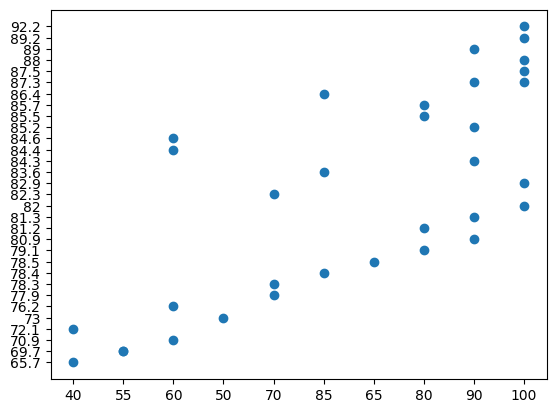

In [37]:
# create scatter plot for current score and participation & engagement current score
plt.scatter(filter_gradebook["Participation & engagement Current Score"], filter_gradebook["Current Score"])

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>],
       [<AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '7'}>]], dtype=object)

0.025551023311775993


count_of_likes
0    1072.201662
1    1098.388186
2    1144.600000
3     996.833333
4    2465.000000
7     575.000000
Name: post_message_length, dtype: float64

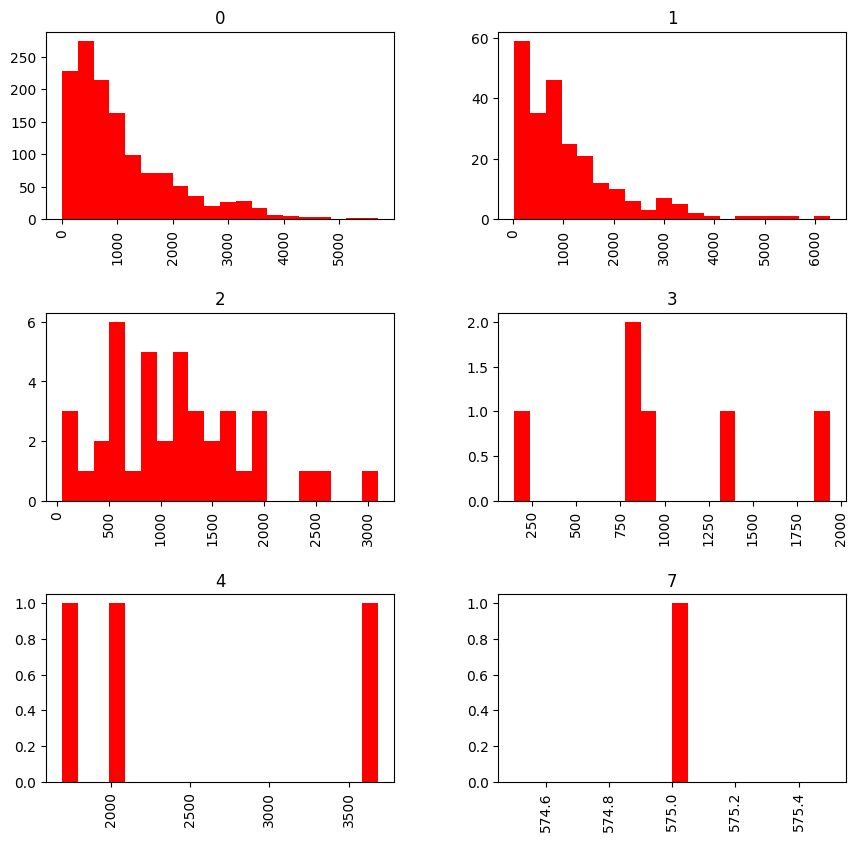

In [42]:
# create histogram for post_message_length and count_of_likes
histogram = discussions_data.hist(column = 'post_message_length', by = 'count_of_likes', figsize = (10, 10), color = 'red', bins = 20)
display(histogram)

# find correlation between post_message_length and count_of_likes
corr = discussions_data['post_message_length'].corr(discussions_data['count_of_likes'])
print(corr)

# display average message length to count of likes
avg_message_len = discussions_data.groupby('count_of_likes')['post_message_length'].mean()
display(avg_message_len)

##### *Comparing current score with total post message length*

In [62]:
# merge gradebook data and discussions data on actor_id
merge_data = pd.merge(filter_gradebook, group_discussion, left_on = 'Student', right_on = 'actor_id')
display(merge_data)

,Student,Participation & engagement Current Score,Current Score,total_post_message_length,total_count_of_likes
0,LEARNER_17,40,65.7,15135,1
1,LEARNER_18,55,69.7,37819,1
2,LEARNER_20,55,69.7,20719,1
3,LEARNER_36,60,70.9,23335,0
4,LEARNER_33,40,72.1,7047,0
5,LEARNER_27,50,73,24829,2
6,LEARNER_15,60,76.2,22457,2
7,LEARNER_31,70,77.9,31634,7
8,LEARNER_30,70,78.3,47094,8
9,LEARNER_10,85,78.4,60378,17


Text(0.5, 0, 'Total Post Message Length')

Text(0, 0.5, 'Current Score')

Text(0.5, 1.0, 'Total Post Message Length vs Current Score')

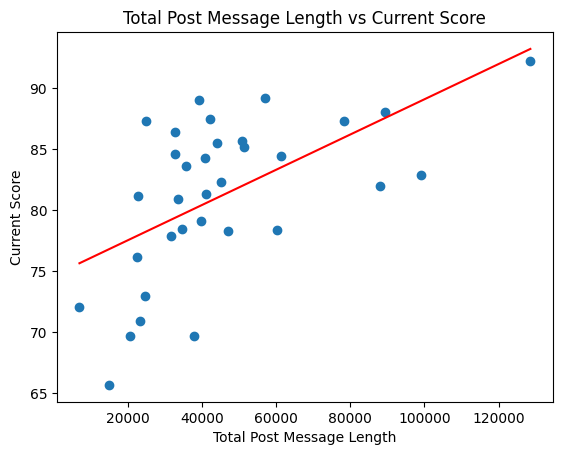

In [67]:
# plot merge_data to see if there is a correlation between current score and total post message length
plt.scatter(merge_data["total_post_message_length"], merge_data["Current Score"])
plt.xlabel("Total Post Message Length")
plt.ylabel("Current Score")
plt.title("Total Post Message Length vs Current Score")

# convert Current Score to numeric
merge_data["Current Score"] = pd.to_numeric(merge_data["Current Score"])

# add a best fit line to the plot
plt.plot(np.unique(merge_data["total_post_message_length"]), np.poly1d(np.polyfit(merge_data["total_post_message_length"], merge_data["Current Score"], 1))(np.unique(merge_data["total_post_message_length"])), color = 'red')

##### *Comparing current score with number of posts*

In [79]:
# merge gradebook data and discussions data on actor_id
merge_data_2 = pd.merge(filter_gradebook, number_of_posts, left_on = 'Student', right_on = 'actor_id')
display(merge_data_2)

,Student,Participation & engagement Current Score,Current Score,number_of_posts
0,LEARNER_17,40,65.7,17
1,LEARNER_18,55,69.7,30
2,LEARNER_20,55,69.7,22
3,LEARNER_36,60,70.9,11
4,LEARNER_33,40,72.1,9
5,LEARNER_27,50,73,18
6,LEARNER_15,60,76.2,16
7,LEARNER_31,70,77.9,26
8,LEARNER_30,70,78.3,34
9,LEARNER_10,85,78.4,57


Text(0.5, 0, 'Number of Posts')

Text(0, 0.5, 'Current Score')

Text(0.5, 1.0, 'Number of Posts vs Current Score')

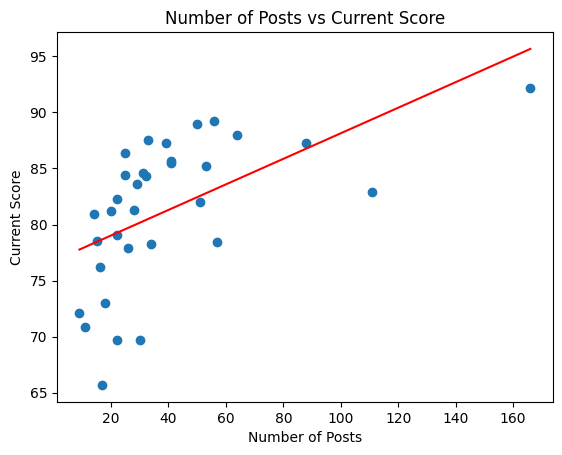

In [83]:
# plot merge_data_2 to see if there is a correlation between current score and number of posts
plt.scatter(merge_data_2["number_of_posts"], merge_data_2["Current Score"])
plt.xlabel("Number of Posts")
plt.ylabel("Current Score")
plt.title("Number of Posts vs Current Score")

# convert Current Score to numeric
merge_data_2["Current Score"] = pd.to_numeric(merge_data_2["Current Score"])

# add a best fit line to the plot
plt.plot(np.unique(merge_data_2["number_of_posts"]), np.poly1d(np.polyfit(merge_data_2["number_of_posts"], merge_data_2["Current Score"], 1))(np.unique(merge_data_2["number_of_posts"])), color = 'red')

## **Conclusion**

idk